In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
from random import shuffle
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
%matplotlib inline

In [672]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import cross_val_score

In [3]:
train = pd.read_csv('/Users/skylark/Desktop/big mart sales prediction/train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test = pd.read_csv('/Users/skylark/Desktop/big mart sales prediction/test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
test.shape

(5681, 11)

In [6]:
def result_df(result):
    result_df = pd.DataFrame({'Outlet_Identifier':test.Outlet_Identifier,'Item_Outlet_Sales':result})
    result_df.index = test_new.index
    return result_df

In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
len(train.Item_Identifier.unique())

1559

In [11]:
len(train.Item_Fat_Content.unique()), train.Item_Fat_Content.unique()

(5, array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object))

In [12]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map(lambda x:'LF' if x=='Low Fat' or x=='low fat' or x=='LF' else 'Regular')
test['Item_Fat_Content'] = test['Item_Fat_Content'].map(lambda x:'LF' if x=='Low Fat' or x=='low fat' or x=='LF' else 'Regular')

In [13]:
test['Item_Fat_Content'].unique()

array(['LF', 'Regular'], dtype=object)

In [14]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
train[train.Item_Identifier=='FDA15']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,LF,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,LF,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,LF,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,LF,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,LF,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,LF,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208


### Null values

#### item weight

In [63]:
train_data = pd.DataFrame(columns=train.columns)
for item in train.Item_Identifier.unique():
    temp = train[train.Item_Identifier==item]
    if len(temp)>1:
        temp.Item_Weight.fillna(temp.Item_Weight.mean(), inplace=True)
        train_data = train_data.append(temp)
    else:
        train_data = train_data.append(temp)

In [65]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [141]:
train_na = list(train_data[train_data.Item_Weight.isnull()==True].Item_Identifier)

In [142]:
pres=[]
for i in train_na:
    if len(test_data[test_data.Item_Identifier==i])>0:
        pres.append([i, 'present'])
    else:
        pres.append([i, 'not present'])

In [143]:
pres

[['FDN52', 'present'],
 ['FDK57', 'present'],
 ['FDE52', 'present'],
 ['FDQ60', 'present']]

In [144]:
item_wt = {}
for i in train_na:
    wt = round((test_data[test_data.Item_Identifier==i].Item_Weight).mean(), 2)
    item_wt[i] = wt

In [148]:
train_wt_na = train_data[train_data.Item_Weight.isnull()==True]
train_wt_not_na = train_data[train_data.Item_Weight.isnull()==False]

In [150]:
train_wt_na_temp = pd.DataFrame(columns=train_wt_na.columns)
for i in item_wt.keys():
    temp = train_wt_na[train_wt_na.Item_Identifier==i]
    temp=temp.fillna(item_wt[i])
    train_wt_na_temp = train_wt_na_temp.append(temp)

In [152]:
train_data = pd.concat([train_wt_not_na, train_wt_na_temp])

In [154]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
age                             0
dtype: int64

In [66]:
test_data = pd.DataFrame(columns=test.columns)
for item in test.Item_Identifier.unique():
    temp = test[test.Item_Identifier==item]
    if len(temp)>1:
        temp.Item_Weight.fillna(temp.Item_Weight.mean(), inplace=True)
        test_data = test_data.append(temp)
    else:
        test_data = test_data.append(temp)

In [67]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                    20
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [72]:
test_na = list(test_data[test_data.Item_Weight.isnull()==True].Item_Identifier.unique())

In [73]:
pres=[]
for i in test_na:
    if len(train_data[train_data.Item_Identifier==i])>0:
        pres.append([i, 'present'])
    else:
        pres.append([i, 'not present'])

In [83]:
len(pres)

16

In [81]:
item_wt = {}
for i in test_na:
    wt = round((train_data[train_data.Item_Identifier==i].Item_Weight).mean(), 2)
    item_wt[i] = wt

In [82]:
item_wt

{'FDL58': 5.78,
 'FDY57': 20.2,
 'FDH58': 12.3,
 'FDI45': 13.1,
 'FDG50': 7.41,
 'FDG57': 14.7,
 'FDJ09': 15.0,
 'FDF22': 6.87,
 'DRN47': 12.1,
 'NCJ30': 5.82,
 'FDT21': 7.42,
 'FDO22': 13.5,
 'FDG09': 20.6,
 'FDF05': 17.5,
 'FDP28': 13.65,
 'FDF04': 17.5}

In [84]:
test_data_wt_na = test_data[test_data.Item_Weight.isnull()==True]
test_data_wt_not_na = test_data[test_data.Item_Weight.isnull()==False]

In [92]:
test_data_wt_not_na_temp = pd.DataFrame(columns=test_data_wt_na.columns)
for i in item_wt.keys():
    temp = test_data_wt_na[test_data_wt_na.Item_Identifier==i]
    temp=temp.fillna(item_wt[i])
    test_data_wt_not_na_temp = test_data_wt_not_na_temp.append(temp)

In [95]:
test_data = pd.concat([test_data_wt_not_na, test_data_wt_not_na_temp])

In [97]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Outlet size

In [274]:
train_data['age'] = 2013 - train_data.Outlet_Establishment_Year
test_data['age'] = 2013 - test_data.Outlet_Establishment_Year

In [157]:
train_data[train_data.Outlet_Size.isnull()==False][train_data.Outlet_Size=='Small'].Outlet_Location_Type.value_counts()

Tier 1    1458
Tier 2     930
Name: Outlet_Location_Type, dtype: int64

In [158]:
train_data[train_data.Outlet_Size.isnull()==False][train_data.Outlet_Size=='Medium'].Outlet_Location_Type.value_counts()

Tier 3    1863
Tier 1     930
Name: Outlet_Location_Type, dtype: int64

In [159]:
train_data[train_data.Outlet_Size.isnull()==False][train_data.Outlet_Size=='High'].Outlet_Location_Type.value_counts()

Tier 3    932
Name: Outlet_Location_Type, dtype: int64

In [160]:
tier3 = train_data[train_data.Outlet_Location_Type=='Tier 3'].copy()
tier2 = train_data[train_data.Outlet_Location_Type=='Tier 2'].copy()
tier1 = train_data[train_data.Outlet_Location_Type=='Tier 1'].copy()

In [161]:
tier3.Outlet_Size.fillna('High', inplace=True)

In [162]:
tier3.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
age                          0
dtype: int64

In [169]:
tier2.Outlet_Size.fillna('Small', inplace=True)

In [170]:
tier2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
age                          0
dtype: int64

In [174]:
tier1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,age
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
5077,DRC01,5.920,Regular,0.019200,Soft Drinks,47.7692,OUT046,1997,Small,Tier 1,Supermarket Type1,492.6920,16
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
6952,FDN15,17.500,LF,0.029299,Meat,140.3180,OUT019,1985,Small,Tier 1,Grocery Store,139.8180,28
5906,FDX07,19.200,Regular,0.022954,Fruits and Vegetables,184.4950,OUT049,1999,Medium,Tier 1,Supermarket Type1,4028.0900,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,FDD28,10.695,LF,0.053380,Frozen Foods,56.7904,OUT049,1999,Medium,Tier 1,Supermarket Type1,1113.2176,14
7600,FDD28,10.695,LF,0.053297,Frozen Foods,59.6904,OUT046,1997,Small,Tier 1,Supermarket Type1,937.4464,16
8135,NCF55,6.675,LF,0.021666,Household,33.3874,OUT046,1997,Small,Tier 1,Supermarket Type1,1235.0590,16
7298,NCW05,20.250,LF,0.148303,Health and Hygiene,108.3938,OUT049,1999,Medium,Tier 1,Supermarket Type1,2787.0388,14


In [180]:
outlets = list(train_data.Outlet_Identifier.unique())

In [256]:
train_sup = pd.DataFrame(columns=train_data.columns)
for outlet in outlets:
    temp = train_data[train_data.Outlet_Identifier==outlet]
    if temp.Outlet_Size.isnull().sum()>1:
        if list(temp.Outlet_Location_Type=='Tier 3')[0] & list(temp.Outlet_Type=='Supermarket Type1')[0]:
            temp.Outlet_Size.fillna('Medium', inplace=True)
        elif list(temp.Outlet_Location_Type=='Tier 1')[0] & list(temp.Outlet_Type=='Supermarket Type1')[0]:
            temp.Outlet_Size.fillna('Medium', inplace=True)
        elif list(temp.Outlet_Location_Type=='Tier 2')[0] & list(temp.Outlet_Type=='Supermarket Type1')[0]:
            temp.Outlet_Size.fillna('Small', inplace=True)
        elif list(temp.Outlet_Location_Type=='Tier 3')[0] & list(temp.Outlet_Type=='Supermarket Type1')[0]:
            temp.Outlet_Size.fillna('High', inplace=True)
        elif list(temp.Outlet_Location_Type=='Tier 3')[0] & list(temp.Outlet_Type=='Supermarket Type3')[0]:
            temp.Outlet_Size.fillna('Medium', inplace=True)
        elif list(temp.Outlet_Location_Type=='Tier 3')[0] & list(temp.Outlet_Type=='Grocery Store')[0]:
            temp.Outlet_Size.fillna('Medium', inplace=True)    
        elif list(temp.Outlet_Location_Type=='Tier 1')[0] & list(temp.Outlet_Type=='Grocery Store')[0]:
            temp.Outlet_Size.fillna('Small', inplace=True)    
            
    train_sup = train_sup.append(temp)        

In [259]:
train_data = train_sup

In [260]:
test_sup = pd.DataFrame(columns=test_data.columns)
for outlet in outlets:
    temp = test_data[test_data.Outlet_Identifier==outlet]
    if temp.Outlet_Size.isnull().sum()>1:
        if list(temp.Outlet_Location_Type=='Tier 3')[0] & list(temp.Outlet_Type=='Supermarket Type1')[0]:
            temp.Outlet_Size.fillna('Medium', inplace=True)
        elif list(temp.Outlet_Location_Type=='Tier 1')[0] & list(temp.Outlet_Type=='Supermarket Type1')[0]:
            temp.Outlet_Size.fillna('Medium', inplace=True)
        elif list(temp.Outlet_Location_Type=='Tier 2')[0] & list(temp.Outlet_Type=='Supermarket Type1')[0]:
            temp.Outlet_Size.fillna('Small', inplace=True)
        elif list(temp.Outlet_Location_Type=='Tier 3')[0] & list(temp.Outlet_Type=='Supermarket Type1')[0]:
            temp.Outlet_Size.fillna('High', inplace=True)
        elif list(temp.Outlet_Location_Type=='Tier 3')[0] & list(temp.Outlet_Type=='Supermarket Type3')[0]:
            temp.Outlet_Size.fillna('Medium', inplace=True)
        elif list(temp.Outlet_Location_Type=='Tier 3')[0] & list(temp.Outlet_Type=='Grocery Store')[0]:
            temp.Outlet_Size.fillna('Medium', inplace=True)    
        elif list(temp.Outlet_Location_Type=='Tier 1')[0] & list(temp.Outlet_Type=='Grocery Store')[0]:
            temp.Outlet_Size.fillna('Small', inplace=True)    
            
    test_sup = test_sup.append(temp)        

In [263]:
test_data = test_sup

In [266]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
age                          0
dtype: int64

In [267]:
test_data.isnull().sum() 

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Outlier analysis

In [268]:
def percentile_based(data, threshold = 95):
    diff = (100 - threshold)/2
    minval, maxval = np.percentile(data, [diff, 100-diff])
    return ((data<minval) | (data>maxval))

In [269]:
def median_based(data, threshold=3.5):
    median = np.median(data)
    mad = np.median([np.abs(y - median) for y in data])
    modified_zscore = [(0.6745*(y - median)/mad) for y in data]
    return np.abs(modified_zscore)>threshold

In [270]:
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if np.abs(val-mean)/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return np.array(isOutlier)        

In [271]:
def outliervote(data):
    x = percentile_based(data)
    y = median_based(data)
    z = std_div(data)
    
    temp = zip(data.index, x, y, z)
    temp = list(temp)
    final = []
    
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
            
    return np.array(final)        

In [272]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4)
    for ax, func in zip(axes, [percentile_based, median_based, std_div, outliervote]):
        sn.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'r+', clip_on=False)
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15, 10)   

In [279]:
train_data[train_data.Item_Visibility==0.328390948]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,age
854,FDU13,8.355,LF,0.328391,Canned,146.0418,OUT019,1985,Small,Tier 1,Grocery Store,588.5672,28


### Feature engineering

In [289]:
np.floor(np.abs(np.log(train_data.Item_Visibility[train_data.Item_Visibility!=0.0])))

0       4.0
2       4.0
5906    3.0
3382    2.0
6220    4.0
       ... 
7387    2.0
4736    3.0
7333    3.0
6528    3.0
5022    1.0
Name: Item_Visibility, Length: 7997, dtype: float64

In [293]:
train_data_visible = train_data[train_data.Item_Visibility!=0.0]
train_data_not_visible = train_data[train_data.Item_Visibility==0.0]

In [299]:
train_data_visible['visibility_bin'] = np.floor(np.abs(np.log(train_data.Item_Visibility[train_data.Item_Visibility!=0.0])))

In [301]:
train_data_not_visible['visibility_bin'] = 0.0

In [302]:
train_data = pd.concat([train_data_visible, train_data_not_visible])

In [307]:
train_data['age'] = pd.to_numeric(train_data.age)
test_data['age'] = pd.to_numeric(test_data.age)

In [308]:
train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,age,visibility_bin
Item_Weight,1.000000,-0.009661,0.026172,0.013261,0.012823,0.021303
Item_Visibility,-0.009661,1.000000,-0.001315,-0.128625,0.074834,-0.470364
Item_MRP,0.026172,-0.001315,1.000000,0.567574,-0.005020,0.000210
Item_Outlet_Sales,0.013261,-0.128625,0.567574,1.000000,0.049135,0.069241
age,0.012823,0.074834,-0.005020,0.049135,1.000000,-0.040484
visibility_bin,0.021303,-0.470364,0.000210,0.069241,-0.040484,1.000000


In [317]:
np.percentile(train_data.Item_Visibility, [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

array([0.01204177, 0.02255804, 0.03195637, 0.04175434, 0.05393093,
       0.06795815, 0.08345606, 0.10692443, 0.1395144 , 0.32839095])

In [329]:
train_data['visibility_bin_2'] = train_data.Item_Visibility.map(lambda x: 0 if (x<0.01204177) else 1 if (x>=0.01204177) & (x<0.02255804) else 2 if (x>=0.02255804) & (x<0.03195637) else 3 if (x>=0.03195637) & (x<0.041754) else 4 if (x>=0.041754) & (x<0.053931) else 5 if (x>=0.053931) & (x<0.067958) else 6 if (x>=0.067958) & (x<0.083456) else 7 if (x>=0.083456) & (x<0.106924) else 8 if (x>=0.106924) & (x<0.139514) else 9)

In [339]:
train_data.corr()['Item_Outlet_Sales']

Item_Weight          0.013261
Item_Visibility     -0.128625
Item_MRP             0.567574
Item_Outlet_Sales    1.000000
age                  0.049135
visibility_bin_2    -0.087751
Name: Item_Outlet_Sales, dtype: float64

In [331]:
test_data['visibility_bin_2'] = test_data.Item_Visibility.map(lambda x:0 if (x<0.01204177) else 1 if (x>=0.01204177) & (x<0.02255804) else 2 if (x>=0.02255804) & (x<0.03195637) else 3 if (x>=0.03195637) & (x<0.041754) else 4 if (x>=0.041754) & (x<0.053931) else 5 if (x>=0.053931) & (x<0.067958) else 6 if (x>=0.067958) & (x<0.083456) else 7 if (x>=0.083456) & (x<0.106924) else 8 if (x>=0.106924) & (x<0.139514) else 9)

In [353]:
np.percentile(train_data.Item_MRP, [20, 40, 60, 80, 100])

array([ 84.68924, 118.76504, 159.43252, 194.48572, 266.8884 ])

In [377]:
train_data['outlet_size_cat'] = train_data.Outlet_Size.map(lambda x: 0 if x=='Small' else 1 if x=='Medium' else 2)
test_data['outlet_size_cat'] = test_data.Outlet_Size.map(lambda x: 0 if x=='Small' else 1 if x=='Medium' else 2)

In [381]:
train_data['outlet_location_type_cat'] = train_data.Outlet_Location_Type.map(lambda x: 0 if x=='Tier 1' else 1 if x=='Tier 2' else 2)
test_data['outlet_location_type_cat'] = test_data.Outlet_Location_Type.map(lambda x: 0 if x=='Tier 1' else 1 if x=='Tier 2' else 2)

In [389]:
train_data.corr()['Item_Outlet_Sales']

Item_Weight                 0.013261
Item_Visibility            -0.128625
Item_MRP                    0.567574
Item_Outlet_Sales           1.000000
age                         0.049135
visibility_bin_2           -0.087751
outlet_size_cat             0.060517
outlet_location_type_cat    0.089367
Name: Item_Outlet_Sales, dtype: float64

In [390]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,age,visibility_bin_2,outlet_size_cat,outlet_location_type_cat
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,1,1,0
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,1,1,0
5906,FDX07,19.200,Regular,0.022954,Fruits and Vegetables,184.4950,OUT049,1999,Medium,Tier 1,Supermarket Type1,4028.0900,14,2,1,0
3382,FDP10,19.000,LF,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842,14,8,1,0
6220,FDH17,16.200,Regular,0.016679,Frozen Foods,96.3726,OUT049,1999,Medium,Tier 1,Supermarket Type1,2740.4328,14,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,FDQ36,7.855,Regular,0.000000,Baking Goods,38.1848,OUT019,1985,Small,Tier 1,Grocery Store,37.2848,28,0,0,0
6308,FDL28,10.000,Regular,0.000000,Frozen Foods,230.0668,OUT019,1985,Small,Tier 1,Grocery Store,691.1004,28,0,0,0
8480,FDQ58,7.315,LF,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020,28,0,0,0
4108,FDA19,7.520,LF,0.000000,Fruits and Vegetables,126.6994,OUT019,1985,Small,Tier 1,Grocery Store,256.9988,28,0,0,0


<Figure size 2160x2160 with 0 Axes>

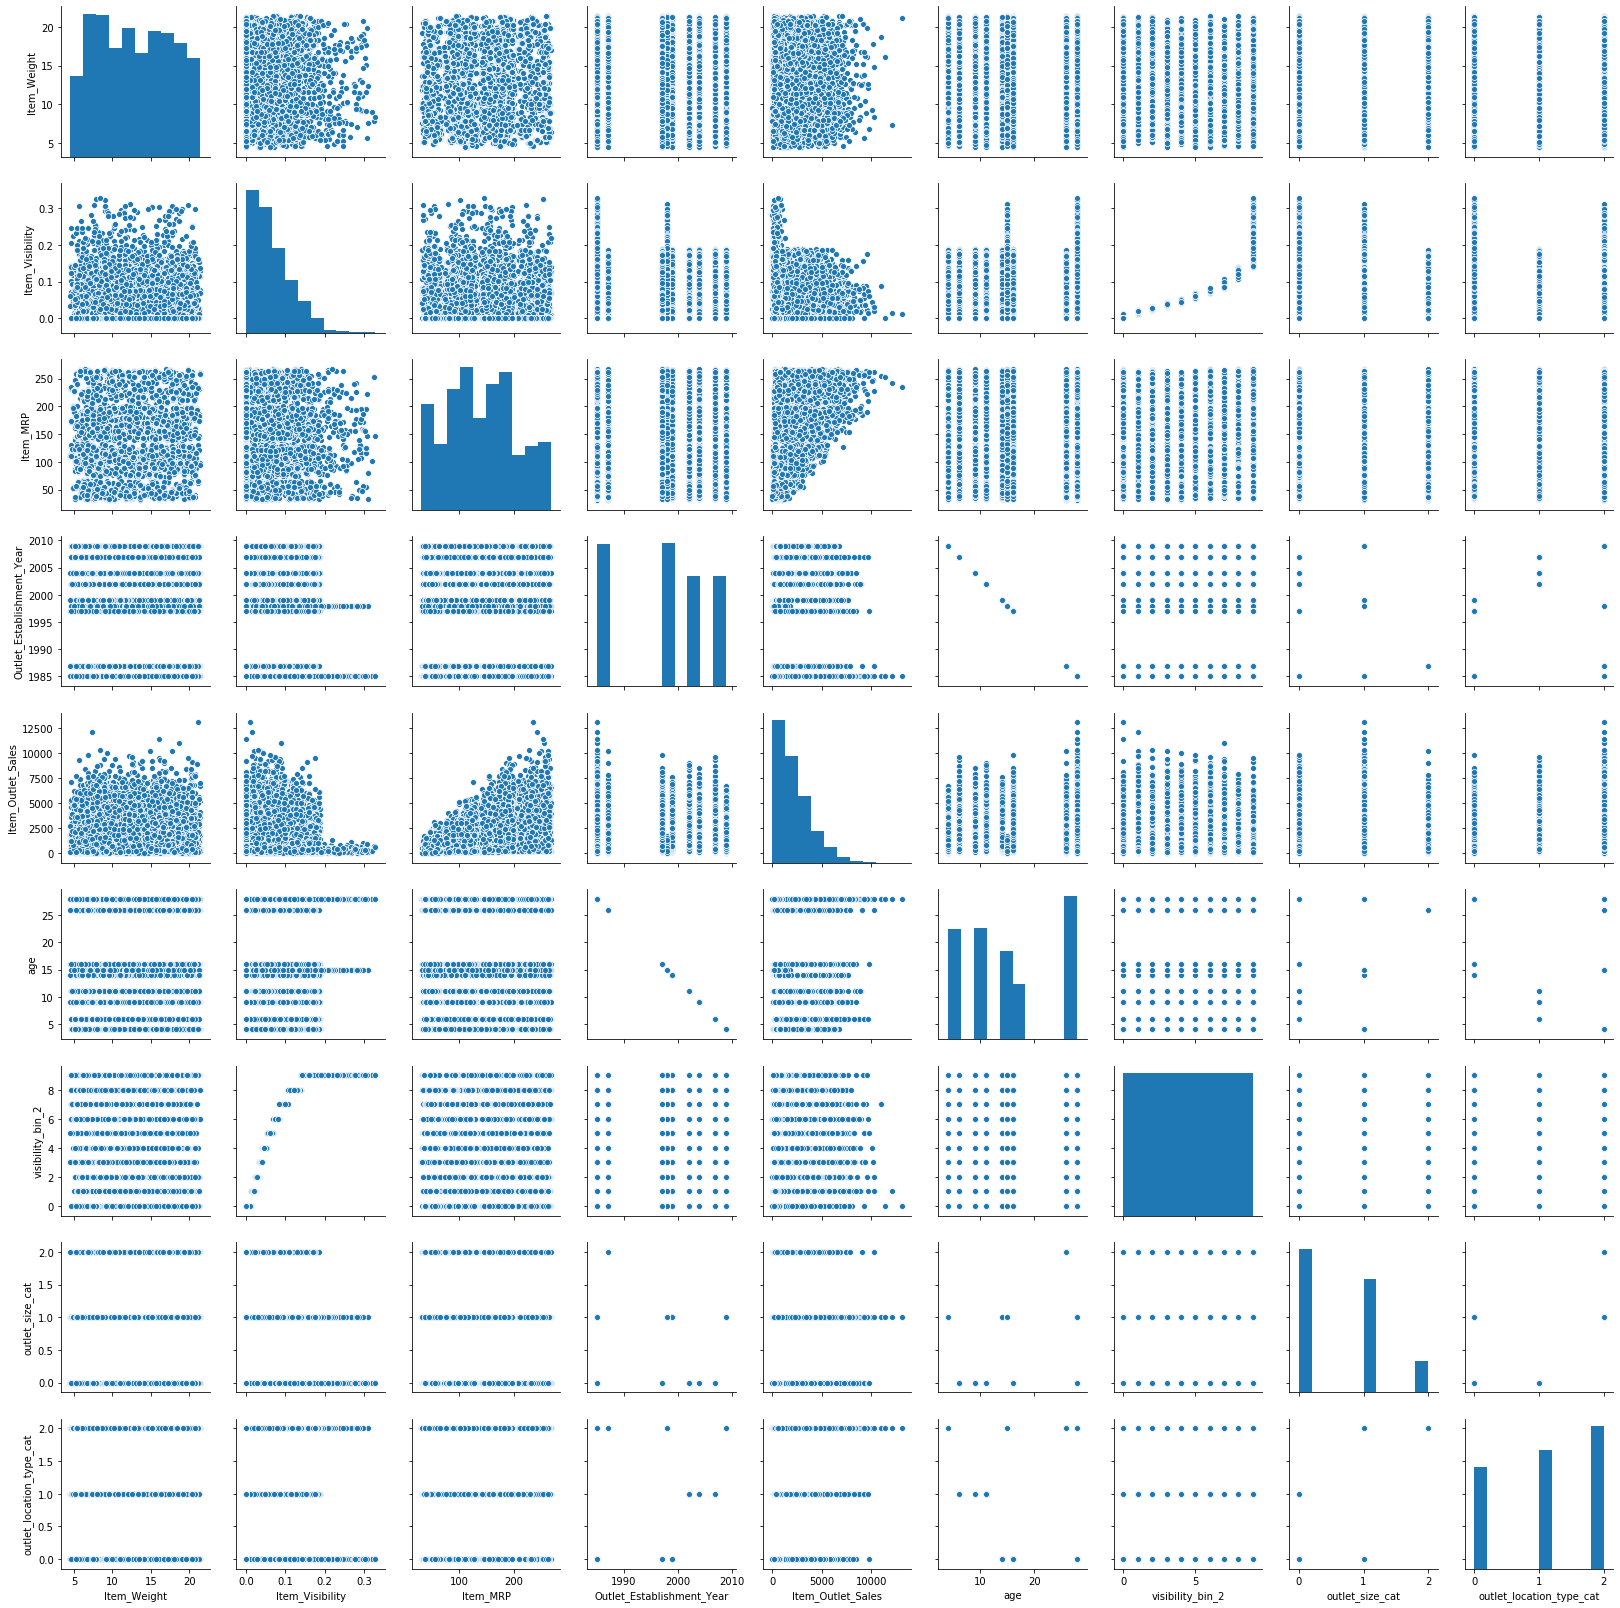

In [393]:
plt.figure(figsize=(30,30))
sn.pairplot(train_data)
plt.show()

In [400]:
train_data['Item_Fat_Content'] = train_data.Item_Fat_Content.map(lambda x: 1 if x=='Regular' else 0)
test_data['Item_Fat_Content'] = test_data.Item_Fat_Content.map(lambda x: 1 if x=='Regular' else 0)

In [403]:
train_data.corr()['Item_Outlet_Sales']

Item_Weight                 0.013261
Item_Fat_Content            0.018719
Item_Visibility            -0.128625
Item_MRP                    0.567574
Item_Outlet_Sales           1.000000
age                         0.049135
visibility_bin_2           -0.087751
outlet_size_cat             0.060517
outlet_location_type_cat    0.089367
Name: Item_Outlet_Sales, dtype: float64

In [412]:
train_data = pd.get_dummies(train_data, columns=['Outlet_Establishment_Year'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Outlet_Establishment_Year'], drop_first=True)

In [413]:
train_data.corr()['Item_Outlet_Sales']

Item_Weight                        0.013261
Item_Fat_Content                   0.018719
Item_Visibility                   -0.128625
Item_MRP                           0.567574
Item_Outlet_Sales                  1.000000
age                                0.049135
visibility_bin_2                  -0.087751
outlet_size_cat                    0.060517
outlet_location_type_cat           0.089367
Item_Type_Breads                   0.002332
Item_Type_Breakfast               -0.004656
Item_Type_Canned                   0.007387
Item_Type_Dairy                    0.008858
Item_Type_Frozen Foods            -0.009482
Item_Type_Fruits and Vegetables    0.025950
Item_Type_Hard Drinks             -0.003956
Item_Type_Health and Hygiene      -0.025587
Item_Type_Household                0.015701
Item_Type_Meat                    -0.002995
Item_Type_Others                  -0.021267
Item_Type_Seafood                  0.007380
Item_Type_Snack Foods              0.022782
Item_Type_Soft Drinks           

In [416]:
x = train_data.drop(['Item_Identifier','Outlet_Size','Outlet_Location_Type','Item_Outlet_Sales'], axis=1)
y = train_data.Item_Outlet_Sales

In [1092]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,age,visibility_bin_2,outlet_size_cat,outlet_location_type_cat,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,9.300,0,0.016047,249.8092,14,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,17.500,0,0.016760,141.6180,14,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5906,19.200,1,0.022954,184.4950,14,2,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3382,19.000,0,0.128289,104.9622,14,8,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6220,16.200,1,0.016679,96.3726,14,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,7.855,1,0.000000,38.1848,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6308,10.000,1,0.000000,230.0668,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8480,7.315,0,0.000000,154.5340,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4108,7.520,0,0.000000,126.6994,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [779]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=100)

In [780]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [781]:
rdm_mod = RandomForestRegressor()

In [639]:
rdm_mod.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [640]:
np.sqrt(mean_squared_error(test_y, rdm_mod.predict(test_x)))

1213.7732886333067

In [641]:
feat_imp = pd.DataFrame({'column': train_x.columns, 'importance': rdm_mod.feature_importances_})

In [642]:
feat_imp.sort_values('importance', ascending=False, inplace=True)

In [643]:
feat_imp['cumsum'] = feat_imp.importance.cumsum()*100

In [644]:
feat_imp

,column,importance,cumsum
3,Item_MRP,0.441649,44.164940
32,Outlet_Type_Supermarket Type1,0.095716,53.736553
2,Item_Visibility,0.077527,61.489245
0,Item_Weight,0.074041,68.893300
27,Outlet_Identifier_OUT027,0.060792,74.972538
34,Outlet_Type_Supermarket Type3,0.059082,80.880727
42,Outlet_Establishment_Year_2009,0.026243,83.505076
4,age,0.021526,85.657708
5,visibility_bin_2,0.012919,86.949583
25,Outlet_Identifier_OUT018,0.012059,88.155467


In [645]:
corr = pd.DataFrame(np.abs(train_data.corr()['Item_Outlet_Sales'])).reset_index()

In [649]:
corr.columns = ['features', 'Item_Outlet_Sales','contri']

In [647]:
corr['contri'] = corr.Item_Outlet_Sales/np.sum(corr.Item_Outlet_Sales)*100

In [650]:
feat = list(corr[corr.contri>1].features)

In [623]:
feat.remove('Item_Outlet_Sales')

In [654]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,age,visibility_bin_2,outlet_size_cat,outlet_location_type_cat,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,9.300,0,0.016047,249.8092,14,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,17.500,0,0.016760,141.6180,14,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5906,19.200,1,0.022954,184.4950,14,2,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3382,19.000,0,0.128289,104.9622,14,8,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6220,16.200,1,0.016679,96.3726,14,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,7.855,1,0.000000,38.1848,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6308,10.000,1,0.000000,230.0668,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8480,7.315,0,0.000000,154.5340,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4108,7.520,0,0.000000,126.6994,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [651]:
from sklearn.preprocessing import StandardScaler

In [652]:
stdsclr = StandardScaler()

In [888]:
x_standardised = x.copy()

In [889]:
x_standardised[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'age', 'visibility_bin_2']] = stdsclr.fit_transform(x[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'age','visibility_bin_2']])

In [890]:
train_x, test_x, train_y, test_y = train_test_split(x_standardised, y, test_size=0.3, random_state=100)

In [712]:
lin_mod = LinearRegression()

In [713]:
lin_mod.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [714]:
pred = lin_mod.predict(test_x)

In [716]:
pred[pred<0] = 0

In [717]:
np.sqrt(mean_squared_error(test_y, pred))

1119.918637907541

In [673]:
cv = cross_val_score(lin_mod, train_x, train_y, cv=5, scoring='r2')

In [675]:
cv.mean()

0.5646496517022129

In [681]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,age,visibility_bin_2,outlet_size_cat,outlet_location_type_cat,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,9.300,0,0.016047,249.8092,14,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,17.500,0,0.016760,141.6180,14,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5906,19.200,1,0.022954,184.4950,14,2,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3382,19.000,0,0.128289,104.9622,14,8,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6220,16.200,1,0.016679,96.3726,14,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,7.855,1,0.000000,38.1848,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6308,10.000,1,0.000000,230.0668,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8480,7.315,0,0.000000,154.5340,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4108,7.520,0,0.000000,126.6994,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [686]:
test_data_g = test_data.drop(['Item_Identifier', 'Outlet_Size', 'Outlet_Location_Type'], axis=1)

In [691]:
test_data_g_standard = test_data_g.copy()

In [911]:
test_data_g_standard[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'age', 'visibility_bin_2']] = stdsclr.fit_transform(test_data_g[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'age','visibility_bin_2']])

In [912]:
test_data_g_standard

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,age,visibility_bin_2,outlet_size_cat,outlet_location_type_cat,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Item_Outlet_Sales
0,1.734065,0,-1.134077,-0.536555,-0.139891,-1.576796,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1650.850613
3911,-0.938847,1,-0.534908,-0.891589,-0.139891,-0.522071,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1379.333649
3147,-0.746698,0,-0.971746,-0.931402,-0.139891,-1.225221,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1370.763883
3394,-1.435858,0,-1.170950,0.698488,-0.139891,-1.576796,1,0,0,0,...,0,0,0,0,1,0,0,0,0,3157.786888
13,-1.693488,0,0.527900,-0.302789,-0.139891,0.884228,1,0,1,0,...,0,0,0,0,1,0,0,0,0,2009.818135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,-0.123018,0,-0.706808,0.649520,1.532446,-0.873646,0,0,0,0,...,0,0,0,0,0,0,0,0,0,545.593979
3875,-1.471282,0,1.473373,0.436151,1.532446,1.587378,0,0,0,0,...,0,0,0,0,0,0,0,0,0,360.809855
3909,-1.127776,0,-0.585007,1.731062,1.532446,-0.522071,0,0,0,0,...,0,0,0,0,0,0,0,0,0,267.204765
4496,1.701861,1,0.356042,0.775558,1.532446,0.884228,0,0,0,0,...,0,0,0,0,0,0,0,0,0,475.449230


In [718]:
res = lin_mod.predict(test_data_g_standard)

In [719]:
res[res<0] = 0

In [1087]:
test_data_g_standard['Item_Outlet_Sales'] = res

In [1088]:
test_res = test.loc[test_data_g_standard.index]

In [1089]:
test_res.drop('Item_Outlet_Sales', axis=1, inplace=True)

In [1090]:
test_res['Item_Outlet_Sales'] = res

In [1091]:
test_res[['Item_Identifier','Outlet_Identifier', 'Item_Outlet_Sales']].sort_index().set_index('Item_Identifier').to_csv('/Users/skylark/Desktop/big mart sales prediction/result.csv')

#### Lasso

In [765]:
lass = Lasso()

In [766]:
lass.fit(train_x, train_y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [755]:
pred = lass.predict(test_x)

In [758]:
pred[pred<0] = 0

In [762]:
pred_lg = lass.predict(test_x)

In [768]:
res = lass.predict(test_data_g_standard.drop('Item_Outlet_Sales', axis=1))

In [771]:
res[res<0] = 0

#### Adaboost

In [778]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [800]:
for i in range(1, 100, 10):
    for n in range(50, 260, 50):
        ada = AdaBoostRegressor(rdm_mod, n_estimators=n, learning_rate=i/100)
        ada.fit(train_x, train_y)
        rmse = np.sqrt(mean_squared_error(test_y, ada.predict(test_x)))
        print(i/100, n, rmse)

0.01 50 1157.4836483954834
0.01 100 1157.8509191042815
0.01 150 1160.7833226416458
0.01 200 1161.215059239397
0.01 250 1160.6611604731054
0.11 50 1165.4477837469867
0.11 100 1171.2776480535117
0.11 150 1173.5323372721607
0.11 200 1174.09886851795
0.11 250 1175.3540605749051
0.21 50 1170.0400433943573
0.21 100 1175.0878637439725
0.21 150 1177.8301009420495
0.21 200 1176.3463096584696
0.21 250 1178.9414022267804
0.31 50 1176.8787874690147
0.31 100 1178.497655180745
0.31 150 1177.7466818546513
0.31 200 1177.927209480957
0.31 250 1179.712993514672
0.41 50 1177.1944798771622
0.41 100 1175.0348877678236
0.41 150 1179.7754776049678
0.41 200 1177.7566486054434
0.41 250 1179.3459148640545
0.51 50 1172.5333943535893
0.51 100 1177.7614130313075
0.51 150 1179.536925980691
0.51 200 1181.4479242341959
0.51 250 1179.3603630054101
0.61 50 1174.8291864796092
0.61 100 1179.9159685203656
0.61 150 1179.5399440470437
0.61 200 1178.7432149970045
0.61 250 1181.7100937592907
0.71 50 1175.6792994501398
0.71 10

In [801]:
ada = AdaBoostRegressor(rdm_mod, n_estimators=50, learning_rate=0.01)
ada.fit(train_x, train_y)
rmse = np.sqrt(mean_squared_error(test_y, ada.predict(test_x)))

In [802]:
rmse

1157.1997312450035

In [806]:
res = ada.predict(test_data.drop(['Item_Identifier','Outlet_Size','Outlet_Location_Type','Item_Outlet_Sales'], axis=1))

#### Gradient boosting

In [854]:
grad = GradientBoostingRegressor(learning_rate=0.11, n_estimators=500)

In [855]:
grad.fit(train_x, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.11, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [856]:
np.sqrt(mean_squared_error(test_y, grad.predict(test_x)))

1150.555221251977

In [847]:
res = grad.predict(test_data.drop(['Item_Identifier','Outlet_Size','Outlet_Location_Type','Item_Outlet_Sales'], axis=1))

In [831]:
for i in range(1, 100, 10):
    for n in range(50, 260, 50):
        grad = GradientBoostingRegressor(n_estimators=n, learning_rate=i/100)
        grad.fit(train_x, train_y)
        rmse = np.sqrt(mean_squared_error(test_y, grad.predict(test_x)))
        print(i/100, n, rmse)

0.01 50 1413.1587369498222
0.01 100 1261.7296805620197
0.01 150 1180.5072359467283
0.01 200 1139.3503925116586
0.01 250 1118.9453032730528
0.11 50 1104.3690135959885
0.11 100 1108.868396238357
0.11 150 1113.4688879147873
0.11 200 1121.3599622537574
0.11 250 1125.5945887046862
0.21 50 1110.9831325635068
0.21 100 1124.3391997950785
0.21 150 1134.108931495362
0.21 200 1145.581813041558
0.21 250 1153.74442114758
0.31 50 1117.310832254185
0.31 100 1132.5936621277792
0.31 150 1148.1044251330648
0.31 200 1163.335845884052
0.31 250 1172.9186644274025
0.41 50 1129.735332353461
0.41 100 1152.2658935531972
0.41 150 1172.0339809706536
0.41 200 1183.8760903018708
0.41 250 1196.4061890482812
0.51 50 1144.2743496024084
0.51 100 1171.133979654615
0.51 150 1206.7513485440209
0.51 200 1219.8998534450618
0.51 250 1232.533107812959
0.61 50 1158.3489210916407
0.61 100 1189.684429165022
0.61 150 1218.9190507658807
0.61 200 1253.2750708383446
0.61 250 1267.6244195006536
0.71 50 1173.8181768388813
0.71 100 12

#### Neural networks

In [1079]:
train_x, test_x, train_y, test_y = train_test_split(x_standardised.loc[:,corrl], y, test_size=0.3, random_state=79)

In [1056]:
train_x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,age,visibility_bin_2,outlet_size_cat,outlet_location_type_cat,Item_Type_Fruits and Vegetables,Item_Type_Health and Hygiene,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
5889,-1.536635,0,-0.177956,0.593277,-0.736822,0.174078,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
8421,-0.425911,0,-0.023119,0.854110,-1.334103,0.174078,1,2,1,0,...,0,1,0,0,0,0,0,0,0,1
6919,-0.769246,0,-0.416863,1.677936,1.293934,-0.174037,2,2,0,0,...,1,0,0,1,0,0,0,0,0,0
1928,1.071198,0,-0.420692,-0.258398,1.293934,-0.174037,2,2,0,0,...,1,0,0,1,0,0,0,0,0,0
3969,1.049672,0,-0.214336,0.066670,0.099372,0.174078,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6977,1.684679,0,-0.866384,0.257518,0.099372,-1.218385,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2838,0.317800,1,0.471779,1.426106,1.532846,0.870310,1,2,0,0,...,0,0,1,0,0,0,0,0,0,0
1290,1.071198,0,-0.934112,-0.759311,1.532846,-1.218385,1,2,0,1,...,0,0,1,0,0,0,0,0,0,0
2099,1.447897,0,-0.485336,-0.826083,1.532846,-0.522153,1,2,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1031]:
test_data_g_standard.drop('Item_Outlet_Sales', axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,age,visibility_bin_2,outlet_size_cat,outlet_location_type_cat,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,1.734065,0,-1.134077,-0.536555,-0.139891,-1.576796,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3911,-0.938847,1,-0.534908,-0.891589,-0.139891,-0.522071,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3147,-0.746698,0,-0.971746,-0.931402,-0.139891,-1.225221,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3394,-1.435858,0,-1.170950,0.698488,-0.139891,-1.576796,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13,-1.693488,0,0.527900,-0.302789,-0.139891,0.884228,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,-0.123018,0,-0.706808,0.649520,1.532446,-0.873646,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3875,-1.471282,0,1.473373,0.436151,1.532446,1.587378,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3909,-1.127776,0,-0.585007,1.731062,1.532446,-0.522071,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4496,1.701861,1,0.356042,0.775558,1.532446,0.884228,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1032]:
from keras import models, layers, regularizers, optimizers, callbacks

In [1077]:
call_backs = [callbacks.ModelCheckpoint(filepath='/Users/skylark/Desktop/age detection/model.h5'),
             callbacks.ReduceLROnPlateau(),
             callbacks.EarlyStopping(patience=100)]

In [1080]:
model = models.Sequential()

In [1081]:
#model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1_l2(), input_shape=(43,)))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(), input_shape=(33,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1()))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1()))
model.add(layers.Dropout(0.5))
#model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l1()))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='relu'))

model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 128)               4352      
_________________________________________________________________
dropout_68 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 256)               33024     
_________________________________________________________________
dropout_69 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_103 (Dense)            (None, 512)               131584    
_________________________________________________________________
dropout_70 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 1)               

In [1082]:
model.compile(optimizer=optimizers.RMSprop(2e-4), loss='mse', metrics=['acc'])
history = model.fit(train_x, train_y, epochs=1000, batch_size=128, validation_split=0.3, callbacks=call_backs)

Train on 4176 samples, validate on 1790 samples
Epoch 1/1000
4176/4176 [==============================] - 1s 356us/step - loss: 7664390.4943 - acc: 0.0000e+00 - val_loss: 7321440.5464 - val_acc: 0.0000e+00
Epoch 2/1000
4176/4176 [==============================] - 1s 123us/step - loss: 7583961.5402 - acc: 0.0000e+00 - val_loss: 7199619.8430 - val_acc: 0.0000e+00
Epoch 3/1000
4176/4176 [==============================] - 1s 121us/step - loss: 7396282.8506 - acc: 0.0000e+00 - val_loss: 6940971.6704 - val_acc: 0.0000e+00
Epoch 4/1000
4176/4176 [==============================] - 1s 136us/step - loss: 7046231.9521 - acc: 0.0000e+00 - val_loss: 6504137.5000 - val_acc: 0.0000e+00
Epoch 5/1000
4176/4176 [==============================] - 0s 113us/step - loss: 6483848.3927 - acc: 0.0000e+00 - val_loss: 5847783.1358 - val_acc: 0.0000e+00
Epoch 6/1000
4176/4176 [==============================] - 1s 126us/step - loss: 5700467.8822 - acc: 0.0000e+00 - val_loss: 5000147.5095 - val_acc: 0.0000e+00
Epoc

In [1083]:
loss = history.history['loss']
val_loss = history.history['val_loss']

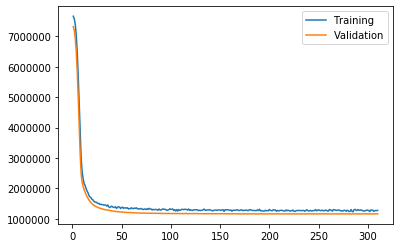

In [1084]:
plt.plot(range(1, len(loss)+1), loss, label='Training')
plt.plot(range(1, len(loss)+1), val_loss, label='Validation')
plt.legend()
plt.show()

In [1085]:
np.sqrt(model.evaluate(test_x, test_y)[0])

2557/2557 [==============================] - 0s 124us/step


1072.2574920023922

In [1086]:
res = model.predict(test_data_g_standard.drop('Item_Outlet_Sales', axis=1).loc[:,corrl])

In [1018]:
corr=np.abs(train_data.corr()['Item_Outlet_Sales'])*100

In [1029]:
x_standardised.loc[:,corrl]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,age,visibility_bin_2,outlet_size_cat,outlet_location_type_cat,Item_Type_Fruits and Vegetables,Item_Type_Health and Hygiene,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,-0.769246,0,-0.970732,1.747454,-0.139541,-1.218385,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,0.995858,0,-0.956917,0.010040,-0.139541,-1.218385,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
5906,1.361794,1,-0.836859,0.698591,-0.139541,-0.870269,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3382,1.318743,0,1.204720,-0.578605,-0.139541,1.218425,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6220,0.716024,1,-0.958484,-0.716544,-0.139541,-1.218385,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,-1.080291,1,-1.281758,-1.650966,1.532846,-1.566500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6308,-0.618566,1,-1.281758,1.430416,1.532846,-1.566500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8480,-1.196530,0,-1.281758,0.217455,1.532846,-1.566500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4108,-1.152402,0,-1.281758,-0.229534,1.532846,-1.566500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1025]:
corrl = list(corr[corr>1].index)

In [1026]:
corrl.remove('Item_Outlet_Sales')

In [1048]:
test_data_g_standard.drop('Item_Outlet_Sales', axis=1).loc[:,corrl]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,age,visibility_bin_2,outlet_size_cat,outlet_location_type_cat,Item_Type_Fruits and Vegetables,Item_Type_Health and Hygiene,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,1.734065,0,-1.134077,-0.536555,-0.139891,-1.576796,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3911,-0.938847,1,-0.534908,-0.891589,-0.139891,-0.522071,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3147,-0.746698,0,-0.971746,-0.931402,-0.139891,-1.225221,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3394,-1.435858,0,-1.170950,0.698488,-0.139891,-1.576796,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
13,-1.693488,0,0.527900,-0.302789,-0.139891,0.884228,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,-0.123018,0,-0.706808,0.649520,1.532446,-0.873646,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3875,-1.471282,0,1.473373,0.436151,1.532446,1.587378,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3909,-1.127776,0,-0.585007,1.731062,1.532446,-0.522071,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4496,1.701861,1,0.356042,0.775558,1.532446,0.884228,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
